# Import packages and set settings

In [1]:
%load_ext autoreload
%autoreload 2

import sys
# sys.path.insert(1, './python_mods/')
sys.path.insert(1, 'python_modules')
import plotting_SF
import model_supp_SF 
import model

In [2]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import collections
import h5py

In [3]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Model

## Model Variables (Constants)

In [4]:
dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)

# Protein concentrations (mM) #2
Sln1_tot = model_supp_SF.molarity_conversion(1176)
Sho1_tot = model_supp_SF.molarity_conversion(1534)
Hog1_tot = model_supp_SF.molarity_conversion(8225)
total_protein = [Sln1_tot, Sho1_tot, Hog1_tot, 0] #mM

# initial values
Sln1 = 0
Sho1 = 0
Hog1_AC = 0
Hog1_AN = 0
Hog1_IN = 0.23 * Hog1_tot
Glycerol = 0.0001
inits = [Sln1, Sho1, Hog1_AC, Hog1_AN, Hog1_IN, Glycerol]

# doses
doses = [150, 350, 550]

# Parameter ranges
number_of_params = 30
minimums = [-8, 0, -4, 0, -8,
        -4, 0, 0, -8, -8,
        0, -8, -8, -8, -4, 
        -4, 0, -4, -4, -4, 
        -8, 0, -4, -4, 0,
        -8, -8, -2, -4,  0
        ]

maximums = [0, 8, 6, 8, 0,
        4, 8, 8, 0, 0,
        8, 0, 0, 0, 4,
        4, 8, 4, 4, 4,
        0, 8, 4, 4, 8,
        0, 2, 6, 4, 1.3
        ]

labelnames = ['$baseosmo$', '$k1$', '$K1$', '$k2$', '$K2$', 
              '$k3$', '$K3$', '$k4$', '$K4$', '$k5$', '$k6$', '$K56$',
              '$k7$', '$K7$', '$k8$', '$K8$', '$k9A$', '$K9a$', '$k9B', '$K9b$', '$k10$', '$K10$', 
              '$k11$', '$K11$', '$k12$', '$k13$', '$k14$', '$k15$','$beta$', '$SF$']

diff = np.asarray(maximums)-np.asarray(minimums) #for plotting
dims = (diff, minimums) #for plotting

# Load experimental data

In [5]:
exp_data, exp_time = model_supp_SF.get_data(input='long')

wt_phospho_data, wt_nuc_data = exp_data
phospho_time, nuc_time = exp_time 

# Load simulation data

In [6]:
model_fxns = model.Model(model.M28MM)

In [8]:
folder = 'C:/Users/Rozemarijn/Documents/Universiteit/Masterstage2/Research/Modelling/Simulations/Simulation_data/Model28/MM_Pbs2/200330_Model28_MM'

all_params, last_params, all_mses, last_mses = model_supp_SF.get_sim_data(folder, num_sims=2000)

Number of runs collected: 500
Best last gen MSE: 33.149680274358126
Mean last gen MSEs of top 5%: 77.19358748846808


In [9]:
sorted_mses_EA, sorted_thetas_EA = model_supp_SF.sort_mses_thetas(last_mses, last_params)

# Check EA results

<Figure size 720x576 with 0 Axes>

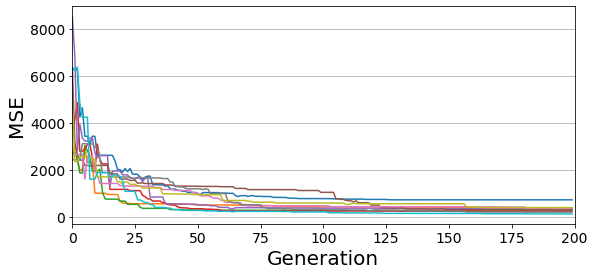

In [10]:
plotting_SF.plt_mses_gen(200, all_mses, 10)

No handles with labels found to put in legend.


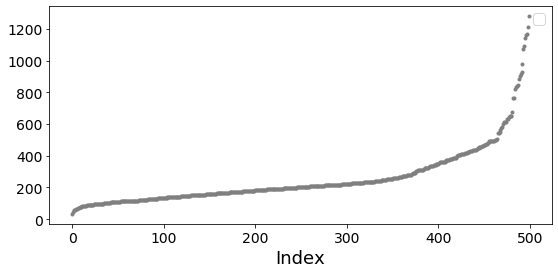

In [11]:
plotting_SF.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


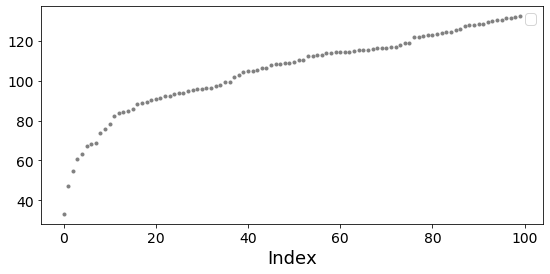

In [12]:
plotting_SF.plt_idx_vs_mse(sorted_mses_EA, 100)

C:\Users\Rozemarijn\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Dose: 150 complete.


C:\Users\Rozemarijn\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\Rozemarijn\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Dose: 350 complete.
Dose: 550 complete.


<Figure size 720x576 with 0 Axes>

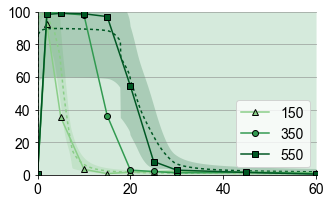

In [13]:
plotting_SF.plt_param_cis(model_fxns, sorted_thetas_EA[0:10], total_protein, inits,  doses, time, param='phospho',
                        exp_data=wt_phospho_data, exp_time=phospho_time, ss=False, ci='sd',
                        save_fig='')

Dose: 150 complete.
Dose: 350 complete.
Dose: 550 complete.


<Figure size 720x576 with 0 Axes>

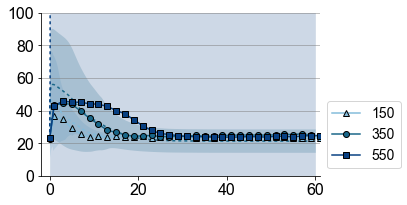

In [14]:
plotting_SF.plt_param_cis(model_fxns, sorted_thetas_EA[0:10], total_protein, inits,  doses, time, param='nuc',      
                        exp_data=wt_nuc_data, exp_time=nuc_time, ss=False, ci='sd',
                        save_fig='')

<Figure size 720x576 with 0 Axes>

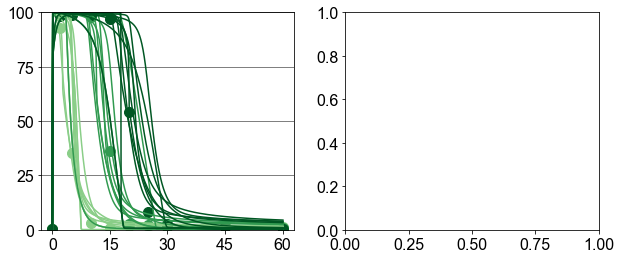

In [15]:
# PLOT INDIVIDUAL SIMS
plotting_SF.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, total_protein, inits,  doses, time, 'phospho', wt_phospho_data, mapk_time=phospho_time,ss=False)

python_modules\plotting_SF.py:68: RuntimeWarning: overflow encountered in add
  phospho = (data[:,2]+data[:,3])/params_constants[2]*100
python_modules\plotting_SF.py:68: RuntimeWarning: overflow encountered in true_divide
  phospho = (data[:,2]+data[:,3])/params_constants[2]*100
python_modules\plotting_SF.py:68: RuntimeWarning: overflow encountered in multiply
  phospho = (data[:,2]+data[:,3])/params_constants[2]*100
python_modules\plotting_SF.py:69: RuntimeWarning: overflow encountered in add
  nuc = (data[:,3]+data[:,4])/params_constants[2]*100
python_modules\plotting_SF.py:69: RuntimeWarning: overflow encountered in true_divide
  nuc = (data[:,3]+data[:,4])/params_constants[2]*100
python_modules\plotting_SF.py:69: RuntimeWarning: overflow encountered in multiply
  nuc = (data[:,3]+data[:,4])/params_constants[2]*100
C:\Users\Rozemarijn\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2485: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta
python_modules\plotti

<Figure size 720x576 with 0 Axes>

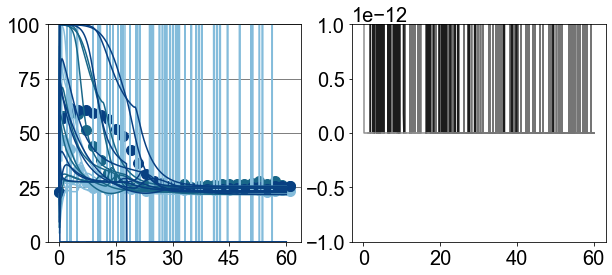

In [16]:
# PLOT INDIVIDUAL SIMS
plotting_SF.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, total_protein, inits,  doses, time, 'nuc', wt_nuc_data, mapk_time=nuc_time,ss=False)

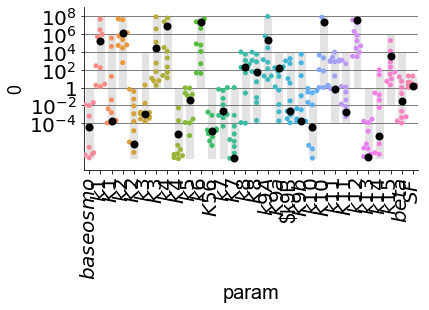

In [17]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

xnum_plt = 0
num_plt = 10
df_plt = sorted_thetas_EA[xnum_plt:num_plt]
df_plt = pd.DataFrame(sorted_thetas_EA[xnum_plt:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting_SF.plt_param_ranges(labelnames, 'M19', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param
#print(df_plt)

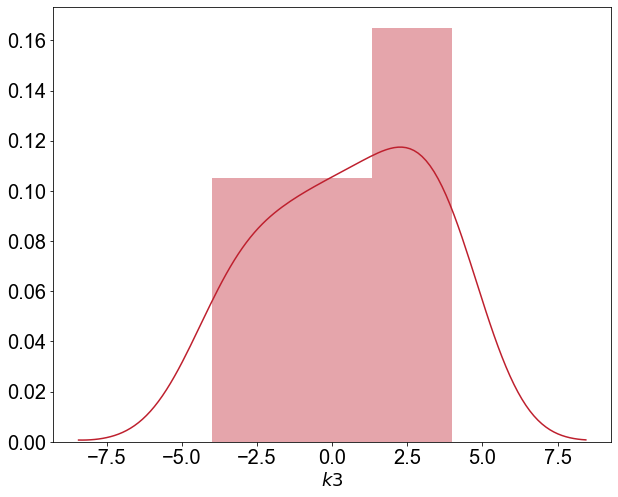

In [26]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[3]]))

# Check ABC - SMC

In [91]:
base_folder = 'C:/Users/sksuzuki/Documents/GitHub/HOG_encoding_feedbacks/python_modules/ABC_SMC/200121_M3c_ea_abc_smc/'

ea = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0000.hdf5', 'r')

In [93]:
list(ea.keys())

['mses', 'thetas']

In [94]:
ea_thetas = ea['thetas']
ea_mses = ea['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\o

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

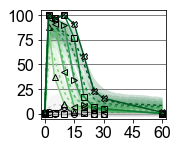

In [96]:
plotting.plt_param_cis(model_fxns, ea_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [97]:
e1 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0001.hdf5', 'r')

In [98]:
e1_thetas = e1['thetas']
e1_mses = e1['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

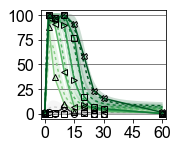

In [99]:
plotting.plt_param_cis(M2c_fxns, e1_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [100]:
e4 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0004.hdf5', 'r')

e4_thetas = e4['thetas']
e4_mses = e4['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

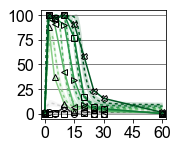

In [102]:
plotting.plt_param_cis(M2c_fxns, e4_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='test03')